In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
model = keras.models.load_model('./models/best_model')

2022-06-27 14:36:32.535875: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [58]:
from PIL import Image
from urllib import request
import cv2
from mtcnn.mtcnn import MTCNN

In [4]:
# # to open the image
# img = Image.open("./inserer_nom_du_fichier_ici.jpg")

# # for personal image
# img = np.asarray(img, dtype='uint8')
# plt.imshow(img)

In [6]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
# data_git for when on macbook
directory = "data_git/new_lfw2/"
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed = 42)
                                            #  seed = 42
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed = 42)
                                            #  seed = 42

Found 3142 files belonging to 12 classes.
Using 2514 files for training.
Found 3142 files belonging to 12 classes.
Using 628 files for validation.


In [7]:
# results = model.predict(train_dataset)

In [8]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [9]:
img.resize((224,224,3))
img = np.expand_dims(img, axis = 0)
face_pp = preprocess_input(img)

In [10]:
print(img.shape, face_pp.shape)

(1, 224, 224, 3) (1, 224, 224, 3)


In [11]:
results2 = model.predict(face_pp)

1/1 [==============================] - 1s 1s/step


In [15]:
print(results2)
print(validation_dataset.class_names)

[[ 1.1690785  -5.461881   -1.9359446   1.5321537   0.40572736  0.9882699
   0.12679048  0.34260908  1.5968635   2.5691097  -0.5283587  -5.1619964 ]]
['Ariel_Sharon', 'Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush', 'Gerhard_Schroeder', 'Hugo_Chavez', 'Jacques_Chirac', 'Jean_Chretien', 'John_Ashcroft', 'Junichiro_Koizumi', 'Serena_Williams', 'Tony_Blair']


1/1 [==============================] - 0s 104ms/step
[[-1.0385427 -5.05612    1.0644199  7.2980905  2.016161   1.8380005
   0.5895462  0.6393967 -2.7443402 -4.271828  -3.195961  -1.1050977]]
3
['Ariel_Sharon', 'Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush', 'Gerhard_Schroeder', 'Hugo_Chavez', 'Jacques_Chirac', 'Jean_Chretien', 'John_Ashcroft', 'Junichiro_Koizumi', 'Serena_Williams', 'Tony_Blair']
Prediction:  George_W_Bush


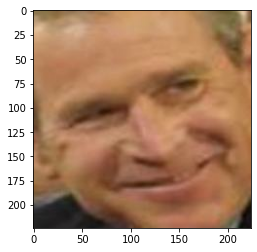

In [57]:
x = np.concatenate([x for x, y in validation_dataset.take(1)], axis=0)
image= validation_dataset.take(1)
for batch, _ in image:
    for test in batch:
        img = test.numpy().astype("uint8")
        plt.imshow(img)
        break

img.resize((224,224,3))
img = np.expand_dims(img, axis = 0)
face_pp = preprocess_input(img)
prediction = model.predict(img)
print(prediction)
maxIndex = prediction.argmax()
print(maxIndex)
class_names = validation_dataset.class_names
print(class_names)
print("Prediction: ", class_names[maxIndex])
# print(image)
# plt.imshow(x[0].astype("uint8"))
# test = preprocess_input(x[0])


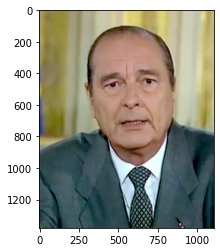

In [84]:
url = "https://m.media-amazon.com/images/M/MV5BYTkyYTZiNjEtOTVlNC00ZTk1LTg5MjEtMGM3NjY1MTEyNDJmXkEyXkFqcGdeQXVyNjUxMjc1OTM@._V1_.jpg"
res = request.urlopen(url)
# res = request.urlopen(yann_le_cun)
# res = request.urlopen(anastasia_volkova)
# res = request.urlopen(richard_dufour)

# Read the res object and convert it to an array
img = np.asarray(bytearray(res.read()), dtype='uint8')
# Add the color variable
img = cv2.imdecode(img, cv2.IMREAD_COLOR)

# Show the image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

1/1 [==============================] - 0s 125ms/step


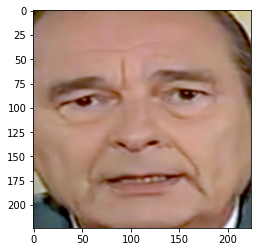

In [85]:
import PIL
# github source: https://github.com/ipazc/mtcnn
# Initialize mtcnn detector
detector = MTCNN()
border_rel = 0 # increase or decrease zoom on image
# detect faces in the image
detections = detector.detect_faces(img)
x1, y1, width, height = detections[0]['box']
dw = round(width * border_rel)
dh = round(height * border_rel)
x2, y2 = x1 + width + dw, y1 + height + dh
face = img[y1:y2, x1:x2]
# resize pixels to the model size
face = PIL.Image.fromarray(face)
face = face.resize((224, 224))
face = np.asarray(face)
# show face
plt.imshow(face)

In [102]:
face.resize((224,224,3))
face = np.expand_dims(face, axis = 0)
prediction = model.predict(face)
print(prediction)
maxIndex = prediction.argmax()
# print(maxIndex)
class_names = validation_dataset.class_names
print(class_names)
print("Prediction: ", class_names[maxIndex])


1/1 [==============================] - 0s 56ms/step
[[-0.9643444  -0.23367183 -2.989792    0.48349983  2.817971   -1.6228673
  -2.7820761  -1.0750563   2.1420934  -1.1400744   3.1787567   1.079158  ]]
['Ariel_Sharon', 'Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush', 'Gerhard_Schroeder', 'Hugo_Chavez', 'Jacques_Chirac', 'Jean_Chretien', 'John_Ashcroft', 'Junichiro_Koizumi', 'Serena_Williams', 'Tony_Blair']
Prediction:  Serena_Williams


In [82]:
img.resize((224,224,3))
img = np.expand_dims(img, axis = 0)
prediction = model.predict(img)
print(prediction)
maxIndex = prediction.argmax()
# print(maxIndex)
class_names = validation_dataset.class_names
print(class_names)
print("Prediction: ", class_names[maxIndex])

1/1 [==============================] - 0s 61ms/step
[[ 3.8827798  -6.9457     -0.21046211 -0.16588512  2.3055396   1.142706
  -0.6972206   2.5325294   1.5779831  -1.9555569  -2.5379837  -3.268737  ]]
['Ariel_Sharon', 'Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush', 'Gerhard_Schroeder', 'Hugo_Chavez', 'Jacques_Chirac', 'Jean_Chretien', 'John_Ashcroft', 'Junichiro_Koizumi', 'Serena_Williams', 'Tony_Blair']
Prediction:  Ariel_Sharon
